# Canopy LW + SW net Energy Balance test per layer

In [1]:

# Use Plots:
using Plots
using BenchmarkTools
using Statistics
using Parameters

In [2]:
using Revise
using Land
using Land.CanopyRT
using Land.Photosynthesis

┌ Info: Precompiling Land [27e3c115-2cb8-4114-b7a5-cd9f011f9dcc]
└ @ Base loading.jl:1273


Reading Optical Parameters from 400.0 to 2380.0 length: 115


In [3]:

# Create an array of standard leaves (needs to be in Module later on:
arrayOfLeaves = Array{leafbio{FT,length(wl), length(wle), length(wlf),length(wle)*length(wlf)}, 1}(undef, CanopyRT.canopy.nlayers)
for i = 1:CanopyRT.canopy.nlayers
    #@show i
    arrayOfLeaves[i] = leafbio{FT, length(wl), length(wle), length(wlf),length(wle)*length(wlf)}()
    CanopyRT.fluspect!(arrayOfLeaves[i], CanopyRT.optis)
end


In [4]:
# 4 Different steps to compute Short-Wave RT
@time CanopyRT.computeCanopyGeomProps!(canopy, angles,canOpt)
@time CanopyRT.computeCanopyMatrices!(arrayOfLeaves,canOpt)
@time CanopyRT.RTM_SW!(canopy, canOpt, canRad,sunRad, soil)
@time CanopyRT.deriveCanopyFluxes!(canopy, canOpt, canRad,sunRad, soil, arrayOfLeaves)
# Compute Long Wave (Last term is LW incoming in W m^-2)
@time CanopyRT.computeThermalFluxes!(arrayOfLeaves, canOpt, canRad, canopy, soil, [Float32(400.0)])

  5.317136 seconds (16.30 M allocations: 678.114 MiB, 1.81% gc time)
  9.710687 seconds (70.83 M allocations: 2.383 GiB, 14.94% gc time)
 81.110898 seconds (89.77 M allocations: 3.121 GiB, 2.31% gc time)
  3.482685 seconds (12.24 M allocations: 480.831 MiB, 7.24% gc time)
  0.828948 seconds (2.77 M allocations: 130.195 MiB)


(Float32[400.0 348.38782 … 70.13702 67.9579], Float32[66.837524 68.76439 … 320.90448 367.72128], Float32[68.90837 61.667393 … 57.87142 64.36518])

In [5]:
#@show arrayOfLeaves[1].kChlrel
# Layer Temperatures are here:
@show canRad.T_sun;
@show canRad.T_shade;

canRad.T_sun = Float32[280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0]
canRad.T_shade = Float32[280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0, 280.0]


In [6]:
# Net Energy fluxes
@show canRad.intNetLW_shade;
@show canRad.intNetLW_sunlit;
@show canRad.intNetSW_shade;
@show canRad.intNetSW_sunlit;
@show canRad.RnSoilLW;
@show canRad.RnSoil;
#@show 1e6 * canRad.absPAR_sunCab;
@show 1e6 * canRad.absPAR_shadeCab;

canRad.intNetLW_shade = Float32[-33.553574, -40.79455, -46.836624, -51.83625, -55.922886, -59.202374, -61.759624, -63.660862, -64.95533, -65.67654, -65.84316, -65.45952, -64.515686, -62.9872, -60.834496, -58.00182, -54.41583, -49.983654, -44.590523, -38.096764]
canRad.intNetLW_sunlit = Float32[-33.553574, -40.79455, -46.836624, -51.83625, -55.922886, -59.202374, -61.759624, -63.660862, -64.95533, -65.67654, -65.84316, -65.45952, -64.515686, -62.9872, -60.834496, -58.00182, -54.41583, -49.983654, -44.590523, -38.096764]
canRad.intNetSW_shade = Float32[143.55609, 130.18578, 118.42244, 108.05272, 98.89533, 90.79627, 83.62495, 77.27102, 71.64161, 66.65873, 62.257877, 58.386036, 55.000595, 52.068283, 49.564457, 47.472424, 45.7832, 44.495293, 43.61463, 43.154858]
canRad.intNetSW_sunlit = Float32[300.77454, 287.40424, 275.64087, 265.27112, 256.11374, 248.01468, 240.84335, 234.48944, 228.85995, 223.87714, 219.47627, 215.60446, 212.21906, 209.28664, 206.78279, 204.6908, 203.00156, 201.71362, 20

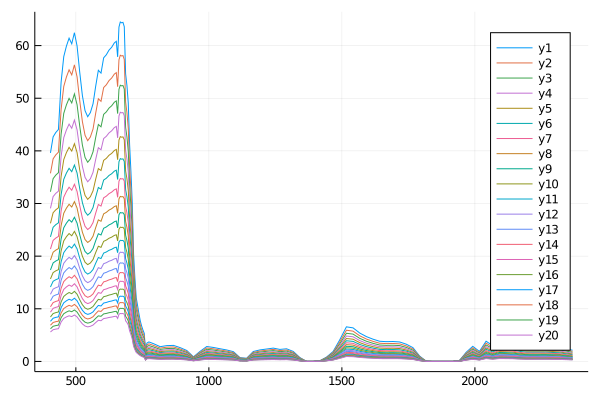

In [7]:
plot(wl, canRad.netSW_sunlit)

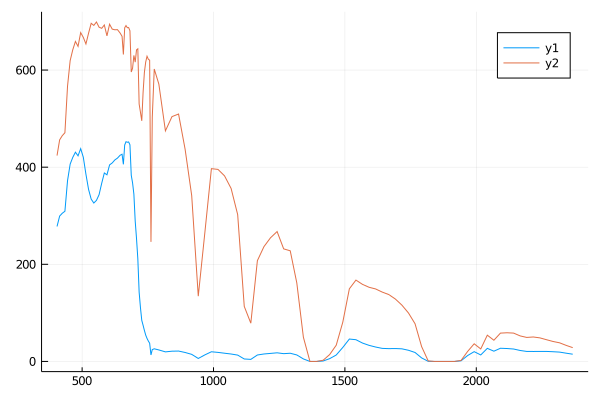

In [8]:
iLAI = canopy.LAI/canopy.nlayers
plot(wl,1 ./canOpt.Ps[10] / iLAI * canRad.netSW_sunlit[:,10])
plot!(wl, sunRad.E_direct)

In [9]:

l = leaf_params{Float32}();
l2 = leaf_params{Float32}();
# Create a Flux structure
met = meteo{Float32}();
l.Vcmax25=120
l.Jmax25=l.Vcmax25*1.8

216.0

In [86]:
# initialize some reasonable values

met.e_air=500;
met.T_air=293;
l.APAR = 1.0e6 * canRad.absPAR_shadeCab[1];
1e6*mean(canRad.absPAR_sunCab[:,:,1])

1027.5564854964614

In [110]:
mods = Photosynthesis.PhotoMods()

Land.Photosynthesis.PhotoMods{FlexasTolBerryFluorescence{Float32},C3FvCBPhoto,RespirationCLM{Float32},BallBerryStomata{Float32},JmaxCLM{Float32},VcmaxCLM{Float32},MM_CLM{Float32},FixedBoundaryResistance{Float32},CurvedColimit{Float32}}(FlexasTolBerryFluorescence{Float32}(5.01f0, 1.93f0, 10.0f0), C3FvCBPhoto(), RespirationCLM{Float32}(46390.0f0, 150650.0f0, 490.0f0, 1.159124f0), BallBerryStomata{Float32}(0.025f0, 9.0f0), JmaxCLM{Float32}(43540.0f0, 150000.0f0, 490.0f0, 1.2068287f0), VcmaxCLM{Float32}(65330.0f0, 150000.0f0, 490.0f0, 1.2068287f0), MM_CLM{Float32}(40.49f0, 27840.0f0, 8.0f0, 4.275f0, 79430.0f0, 36380.0f0, 37830.0f0, 36000.0f0), FixedBoundaryResistance{Float32}(1.0f0), CurvedColimit{Float32}(0.995f0))

In [116]:
l.dynamic_state = false
@btime Photosynthesis.CanopyPhotosynthesis!(mods, l, met, canRad)

  5.629 ms (234000 allocations: 4.36 MiB)


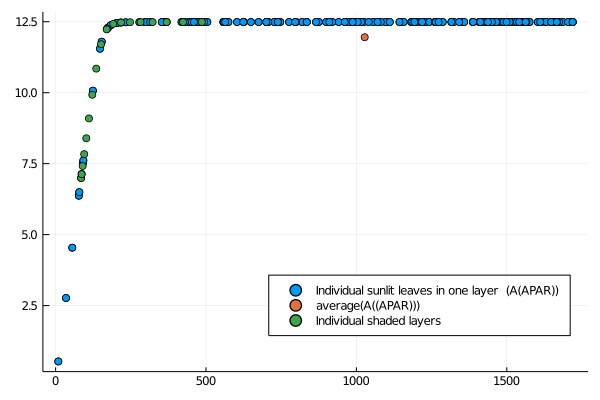

In [89]:
using Plots

plot(Float32(1.0e6) * canRad.absPAR_sunCab[:,:,1][:], canRad.GPP_sun[:,:,1][:], seriestype = :scatter,legend=:bottomright, label="Individual sunlit leaves in one layer  (A(APAR))")
#plot!([Float32(1.0e6) * mean(canRad.absPAR_sunCab[:,:,1])], [f.an], seriestype = :scatter,  label="A(average(APAR))")
plot!([Float32(1.0e6) * mean(canRad.absPAR_sunCab[:,:,1])], [mean(canRad.GPP_sun)], seriestype = :scatter, label="average(A((APAR)))")
plot!(Float32(1.0e6) * canRad.absPAR_shadeCab[:], canRad.GPP_shade, seriestype = :scatter,legend=:bottomright, label="Individual shaded layers")



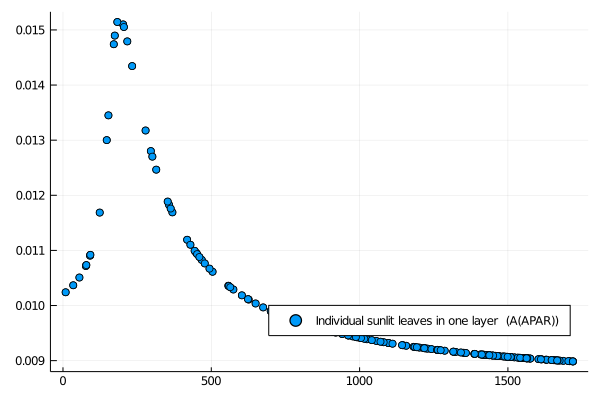

In [109]:
plot(Float32(1.0e6) * canRad.absPAR_sunCab[:,:,1][:], canRad.ϕ_sun[:,:,1][:], seriestype = :scatter,legend=:bottomright, label="Individual sunlit leaves in one layer  (A(APAR))")

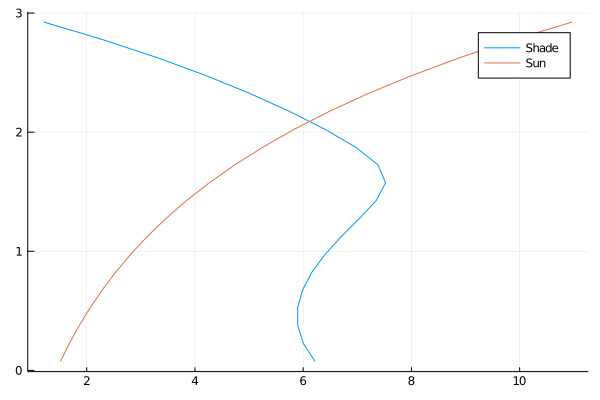

In [91]:
sF = (canOpt.Ps[2:end]+canOpt.Ps[1:end-1])/2
plot((1 .- sF).*canRad.GPP_shade,reverse(layers), label="Shade" )
plot!((sF).*mean(canRad.GPP_sun,dims=(1,2))[1,1,:],reverse(layers),label="Sun"   )

In [92]:
mean(canRad.GPP_sun,dims=(1,2))[1,1,:]

20-element Array{Float32,1}:
 12.143097 
 12.116436 
 12.08959  
 12.062938 
 12.036997 
 12.012231 
 11.988978 
 11.967503 
 11.9479885
 11.930537 
 11.915177 
 11.901883 
 11.890609 
 11.881296 
 11.87389  
 11.868347 
 11.864636 
 11.862752 
 11.862698 
 11.864509 

In [93]:
levels = collect(0:canopy.LAI/canopy.nlayers:canopy.LAI)

21-element Array{Float32,1}:
 0.0 
 0.15
 0.3 
 0.45
 0.6 
 0.75
 0.9 
 1.05
 1.2 
 1.35
 1.5 
 1.65
 1.8 
 1.95
 2.1 
 2.25
 2.4 
 2.55
 2.7 
 2.85
 3.0 

In [94]:
layers = (levels[2:end]+levels[1:end-1])/2

20-element Array{Float32,1}:
 0.075     
 0.22500001
 0.375     
 0.525     
 0.675     
 0.825     
 0.97499996
 1.125     
 1.2750001 
 1.425     
 1.575     
 1.7249999 
 1.875     
 2.025     
 2.175     
 2.325     
 2.475     
 2.625     
 2.775     
 2.925     

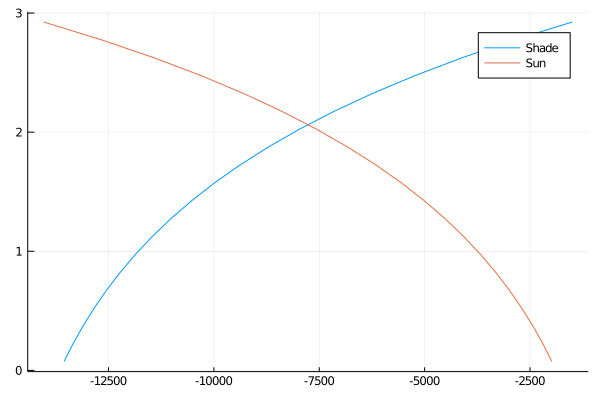

In [95]:
plot((1 .- sF).*canRad.H_shade,reverse(layers), label="Shade" )
plot!((sF).*mean(canRad.H_sun,dims=(1,2))[1,1,:],reverse(layers),label="Sun"   )

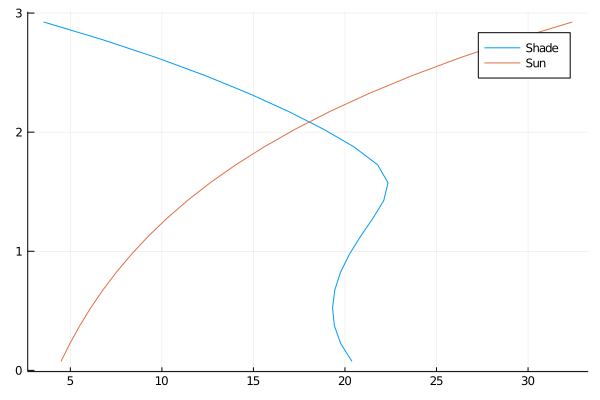

In [102]:
plot((1 .- sF).*canRad.LE_shade,reverse(layers), label="Shade" )
plot!((sF).*mean(canRad.LE_sun,dims=(1,2))[1,1,:],reverse(layers),label="Sun"   )

In [96]:
l.LE

36.73948f0

In [97]:
met.T_air

293.0f0

In [98]:
l.T

280.0f0

In [99]:
l.esat-met.e_air

491.69287f0

In [100]:
l.esat

991.6929f0

In [101]:
met.e_air

500.0f0

In [104]:
met.g_m_s_to_mol_m2_s/l.gs

244.86409f0